In [1]:
from keras.datasets import cifar10
from keras.utils import plot_model,print_summary,np_utils
import numpy as np

Using TensorFlow backend.


In [3]:
np.random.seed(4396)
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_train4D = x_train.reshape(x_train.shape[0],32,32,3).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],32,32,3).astype('float32')

x_train4D /=255.
x_test4D /=255.

y_train,y_test = np_utils.to_categorical(y_train),np_utils.to_categorical(y_test)

In [4]:
batch_size = 64
num_classes = 10
epoch = 100

In [78]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,AlphaDropout 
from keras.layers.normalization import BatchNormalization

In [85]:
model0 = Sequential([
    Conv2D(filters=32,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (32,32,3)),

    Conv2D(filters=32,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    MaxPooling2D(pool_size=(4,4)),
    AlphaDropout(0.1),
    Conv2D(filters=64,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Conv2D(filters=64,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    AlphaDropout(0.1),
    Flatten(),
    Dense(512,
          activation='selu',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
    AlphaDropout(0.2),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model0)
plot_model(model0,to_file='model0.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
alpha_dropout_148 (AlphaDrop (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
alpha_dropout_149 (AlphaDrop (None, 4, 4, 64)          0         
__________

In [86]:
model1 = Sequential([
    Conv2D(filters=32,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Conv2D(filters=64,
           kernel_size=(5,5),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           ),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Flatten(),
    Dense(128,
          activation='selu',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
    AlphaDropout(0.2),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model1)
plot_model(model1,to_file='model1.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
alpha_dropout_152 (AlphaDrop (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
alpha_dropout_153 (AlphaDrop (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 4096)              0         
__________

In [87]:
model2 = Sequential([

    Conv2D(filters=32,
           kernel_size=(3,3),
           activation='selu',
           kernel_initializer='lecun_normal',
           bias_initializer='zeros',
           padding = 'SAME',
           input_shape = (32,32,3)
           ),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Flatten(),
    Dense(70,
          activation='selu',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
    AlphaDropout(0.2),
    Dense(10,
          activation='softmax',   
          kernel_initializer='lecun_normal',
          bias_initializer='zeros',
         ),
])
print_summary(model2)
plot_model(model2,to_file='model2.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
alpha_dropout_155 (AlphaDrop (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_91 (Dense)             (None, 70)                573510    
_________________________________________________________________
alpha_dropout_156 (AlphaDrop (None, 70)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                710       
Total para

In [88]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
i = 0
for model in [model0,model1,model2]:
    #图像增强
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

    
#     def lr_schedule(epoch):
#         return lr*(0.1**int(epoch/10))
#     sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train4D)
    
    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(
                        datagen.flow(x_train4D, y_train,batch_size=batch_size),
                        steps_per_epoch=x_train4D.shape[0] // batch_size,
                        epochs=100,
                        validation_data=(x_test4D, y_test),
                        shuffle = True,
                        )
    
    model.save('CNN_cifar_model{}.h5'.format(i))
    np.save('train_acc_history_CNN_cifar_model{}.npy'.format(i), history.history['acc'])
    np.save('train_loss_history_CNN_cifar_model{}.npy'.format(i), history.history['loss'])
    np.save('train_val_acc_history_CNN_cifar_model{}.npy'.format(i), history.history['val_acc'])
    i+=1

Epoch 1/100
781/781 [==============================] - 18s 24ms/step - loss: 1.7122 - acc: 0.3906 - val_loss: 1.7293 - val_acc: 0.5305
Epoch 2/100
781/781 [==============================] - 15s 20ms/step - loss: 1.3563 - acc: 0.5221 - val_loss: 1.4208 - val_acc: 0.6281
Epoch 3/100
781/781 [==============================] - 15s 20ms/step - loss: 1.2186 - acc: 0.5766 - val_loss: 1.2684 - val_acc: 0.6735
Epoch 4/100
781/781 [==============================] - 15s 20ms/step - loss: 1.1497 - acc: 0.6023 - val_loss: 1.5402 - val_acc: 0.6657
Epoch 5/100
781/781 [==============================] - 16s 20ms/step - loss: 1.0983 - acc: 0.6216 - val_loss: 1.3239 - val_acc: 0.6978
Epoch 6/100
781/781 [==============================] - 16s 20ms/step - loss: 1.0686 - acc: 0.6313 - val_loss: 1.3733 - val_acc: 0.7018
Epoch 7/100
781/781 [==============================] - 16s 21ms/step - loss: 1.0479 - acc: 0.6419 - val_loss: 1.5876 - val_acc: 0.6876
Epoch 8/100
781/781 [==============================] - 

781/781 [==============================] - 14s 19ms/step - loss: 1.2015 - acc: 0.5860 - val_loss: 1.4087 - val_acc: 0.6587
Epoch 22/100
781/781 [==============================] - 15s 19ms/step - loss: 1.2075 - acc: 0.5840 - val_loss: 1.5430 - val_acc: 0.6639
Epoch 23/100
781/781 [==============================] - 15s 20ms/step - loss: 1.1946 - acc: 0.5894 - val_loss: 1.2468 - val_acc: 0.6787
Epoch 24/100
781/781 [==============================] - 15s 20ms/step - loss: 1.1919 - acc: 0.5897 - val_loss: 1.5015 - val_acc: 0.6619
Epoch 25/100
781/781 [==============================] - 15s 19ms/step - loss: 1.1845 - acc: 0.5931 - val_loss: 1.4565 - val_acc: 0.6830
Epoch 26/100
781/781 [==============================] - 15s 20ms/step - loss: 1.1770 - acc: 0.5963 - val_loss: 1.3370 - val_acc: 0.6882
Epoch 27/100
781/781 [==============================] - 15s 20ms/step - loss: 1.1735 - acc: 0.5983 - val_loss: 1.3286 - val_acc: 0.6804
Epoch 28/100
781/781 [==============================] - 15s 1

781/781 [==============================] - 14s 18ms/step - loss: 1.3464 - acc: 0.5211 - val_loss: 1.3740 - val_acc: 0.5922
Epoch 42/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3439 - acc: 0.5230 - val_loss: 1.4206 - val_acc: 0.5882
Epoch 43/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3451 - acc: 0.5209 - val_loss: 1.2970 - val_acc: 0.6121
Epoch 44/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3429 - acc: 0.5209 - val_loss: 1.3043 - val_acc: 0.6005
Epoch 45/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3430 - acc: 0.5229 - val_loss: 1.3999 - val_acc: 0.5803
Epoch 46/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3324 - acc: 0.5258 - val_loss: 1.3480 - val_acc: 0.6027
Epoch 47/100
781/781 [==============================] - 15s 19ms/step - loss: 1.3330 - acc: 0.5270 - val_loss: 1.3860 - val_acc: 0.5762
Epoch 48/100
781/781 [==============================] - 15s 1

In [92]:
train_acc_history_CNN_cifar_model0 = np.load('train_acc_history_CNN_cifar_model0.npy')
train_val_acc_history_CNN_cifar_model0 = np.load('train_val_acc_history_CNN_cifar_model0.npy')
train_loss_history_CNN_cifar_model0 = np.load('train_loss_history_CNN_cifar_model0.npy')

train_acc_history_CNN_cifar_model1 = np.load('train_acc_history_CNN_cifar_model1.npy')
train_val_acc_history_CNN_cifar_model1 = np.load('train_val_acc_history_CNN_cifar_model1.npy')
train_loss_history_CNN_cifar_model1 = np.load('train_loss_history_CNN_cifar_model1.npy')

train_acc_history_CNN_cifar_model2 = np.load('train_acc_history_CNN_cifar_model2.npy')
train_val_acc_history_CNN_cifar_model2 = np.load('train_val_acc_history_CNN_cifar_model2.npy')
train_loss_history_CNN_cifar_model2 = np.load('train_loss_history_CNN_cifar_model2.npy')


In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

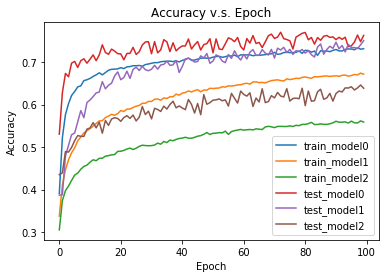

In [95]:
plt.plot(train_acc_history_CNN_cifar_model0)
plt.plot(train_acc_history_CNN_cifar_model1)
plt.plot(train_acc_history_CNN_cifar_model2)
plt.plot(train_val_acc_history_CNN_cifar_model0)
plt.plot(train_val_acc_history_CNN_cifar_model1)
plt.plot(train_val_acc_history_CNN_cifar_model2)
plt.title('Accuracy v.s. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_model0', 'train_model1', 'train_model2','test_model0','test_model1','test_model2'],
     loc='best')
plt.savefig('CNN_CIFAR_ACC.png')

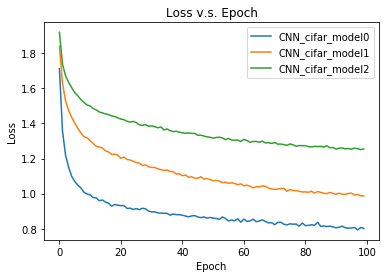

In [96]:
plt.plot(train_loss_history_CNN_cifar_model0)
plt.plot(train_loss_history_CNN_cifar_model1)
plt.plot(train_loss_history_CNN_cifar_model2)
plt.title('Loss v.s. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['CNN_cifar_model0', 'CNN_cifar_model1', 'CNN_cifar_model2'],
     loc='best')
plt.savefig('CNN_cifar_LOSS.png')


In [97]:
def print_best_acc(model):
    best_acc = np.amax(model)
    best_acc_at_epoch = np.argmax(model)
    print('best acc = {}, at epoch {}'.format(best_acc,best_acc_at_epoch))

In [98]:
print_best_acc(train_acc_history_CNN_cifar_model0)

best acc = 0.7339394424863825, at epoch 97


In [99]:
print_best_acc(train_acc_history_CNN_cifar_model1)

best acc = 0.6742230054469721, at epoch 98


In [100]:
print_best_acc(train_acc_history_CNN_cifar_model2)

best acc = 0.5617790772188401, at epoch 98


结论 相同参数下,模型越深,能够更快的收敛,acc更高,loss更低,val_acc也更高.
因此推荐深度网络